# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save tsv to file
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
# This code didn't work for me. I creater a developer account, I added my keys and I got an error about Twitter API v2 not being accessible with the Free subscription. I suspect a new policy for Udacity to review.
# Added the below code because the last reviewer told me to, and to comment it out if not being used.

# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [4]:
# Using provided json file instead
import json

# List creation
list_API = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    line_data = json.loads(line)
    list_API.append({'tweet_id': line_data['id_str'],
                                    'retweet_count': line_data['retweet_count'],
                                    'favorite_count': line_data['favorite_count']})
    
df_API = pd.DataFrame.from_dict(list_API)

## Assessing Data

### Assess dataframe, 'df'

In [5]:
# Visual assessment of 'df' head
# Observations - dog stage is split across four columns, score split across two columns, many NaN values
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
# Visual assessment of 'df' head
# Observations - nothing specific
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
# Programmatic assessment of 'df' - using info function to asses non-null count and data types
# Observations - 181 retweets present, 2356 rows in total, some missing information in expanded_urls etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# Programmatic assessment of 'df' - using descibe function to assess max min ranges and count
# Observations - rating_denominator is not constant
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
# Programmatic assessment of 'df' - looking for duplicates
# Observations - no duplicate rows
df[df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
# Look for null values
# Observation - reply columns, retween columns, and expanded urls contains null values
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
# Looking for tweet_id duplicates
# Observations - all unique
df.tweet_id.duplicated().sum()

0

In [12]:
# Looking for irregularities in dog name
# Obserations - lowercase appear to be all non dog names
mask = df.name.str.contains('^[a-z]', regex = True)
df[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [13]:
# Inspect potentially erroneous dog names
# Observations - many of these aren't actually dogs
df.query('name =="a" or name == "the" or name == "an" or name == "my"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None


In [14]:
# Check for text duplicates to see if dog is duplicated or just dog name
df.text.duplicated().sum()

0

In [15]:
# Check to see most recent timestamp
# Observations - August 8th 2017 latest time stamp
df.timestamp.sort_values(ascending=False).head(5)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [16]:
# Examine dogs that are 'floofer'
# Observations - index 200 is also labelled 'doggo'
df[df.floofer != 'None'].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None


In [17]:
# Inspect dogs that don't have a stage
# Observations - some exist without a stage
df.query('doggo == "None" and floofer == "None" and pupper == "None" and puppo == "None"').head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
# Examine denominators
# Observations - mostly '10' but not all the same
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Assess dataframe, 'df_predictions'

In [19]:
# Visual assessment
# Observations - useful information can be used to identify as dog and dog breed, assessed three times with varying confidence
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
# Visual assessment
# Observations - some images are recognized not as dogs e.g. paper_towel, orange
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
# Programmatic assessment
# Observations - 2075 entries, all non-null, tweet_id is also an integer as with first df
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Programmatic assessment
# Observations - nothing specific
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# Assses dog breeds in p1
# Observations - many non-dog values e.g. sea_urchin
df_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [24]:
# # Assses dog breeds in p2
# Observations - many non-dog values e.g. laptop
df_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
miniature_pinscher                 20
Samoyed                            20
toy_terrier                        20
malinois                           20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [25]:
# Assses dog breeds in p3
# Observations - many non-dog values e.g. beach_wagon
df_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [26]:
# Assess number non-dog in p1
df_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [27]:
# Assess number non-dog in p2
df_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [28]:
# Assess number non-dog in p3
df_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Assess dataframe, 'df_API'

In [29]:
# Intiail visual assessment
# Observations - useful infomration such as tweet_id, favorite_count and retweet_count to aid in analysis
df_API.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [30]:
# Programmatic assessment
# Observations - 2354 entries, 0 null values, tweed_id is object not integer (this will need to be changed to merge with other dfs)
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [31]:
# Programmatic assessment
# Observations - favorite count ranges from zero to 132810 and retweet_count from 0 to 79515
df_API.describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


### Quality Issues

Note: Three new dataframes with the suffix '_clean' are created to preserve raw data.

1. Regarding 'df_clean', remove 181 retweets.

2. Regarding 'df_clean', remove rows that are using typo dog names. For the most part these appear to be spam (lobsters, humans, etc.), and names with lowercase first characters. This includes the following names; 'a', 'the', 'an', 'my'.

3. Regarding 'df_clean', recreate the user rating from 'text' column and convert to float.

4. Regarding 'df_clean', concatenate rating_numerator2 and rating_denominator2 into a single column 'score_ratio' and calculate a new value converting the ratio into a percentage for ease of analysis (readability and ranking), 'score_percentage'.

5. Regarding 'df_predictions_clean', keep rows where each AI recognizes the image as a dog.

6. Regarding 'df_API_clean', convert data type of column 'tweet_id' in dataframe 'df_API_clean' to int64.

### Tidiness issues

1. Regarding 'df_clean', drop columns that aren't of interest in later analysis.

2. Regarding 'df_clean', create a new column to account for dogs that aren't defined as either doggo, floofer, pupper and pupper. Once complete, melt the *doggo*, *floofer*, *pupper*, *puppo* and new 'Unknown' columns to a *dog_stage* column. Remove 'None' entries. Remove those that had multiple dog_stage definitions (remove duplicates).

3. Merge 'df_predictions_clean' with 'df_clean', then merge 'df_API_clean' with 'df_clean'.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
df_clean = df.copy()
df_predictions_clean = df_predictions.copy()
df_API_clean = df_API.copy()

### Quality Issue #1:

#### Define
Regarding 'df_clean', remove 181 retweets.

#### Code

In [33]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()==True]

#### Test

In [34]:
df_clean[df_clean.retweeted_status_id.isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #2:

#### Define
Regarding 'df_clean', remove rows that are using typo dog names. For the most part these appear to be spam (lobsters, humans, etc.), and names with lowercase first characters. This includes the following names; 'a', 'the', 'an', 'my'.

#### Code

In [35]:
# remove the dog names lowercase values from the dataset, you can index of rows where the dog names were lower case
lower_dog_name_index = df_clean[df_clean.name.str.islower()].index

# Then drop the rows using this index
df_clean.drop(lower_dog_name_index, inplace=True)

#### Test

In [36]:
mask = df_clean.name.str.contains('^[a-z]', regex = True)
df_clean[mask].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

In [37]:
df_clean.shape

(2071, 17)

### Quality Issue #3:

#### Define
Regarding 'df_clean', recreate the user rating from 'text' column and convert to float.

#### Code

In [38]:
df_clean[['rating_numerator2', 'rating_denominator2']] = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
df_clean = df_clean.astype({'rating_numerator2': float,'rating_denominator2':float})

#### Test

In [39]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator2,rating_denominator2
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13.0,10.0


In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2071 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2071 non-null object
source                        2071 non-null object
text                          2071 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2013 non-null object
rating_numerator              2071 non-null int64
rating_denominator            2071 non-null int64
name                          2071 non-null object
doggo                         2071 non-null object
floofer                       2071 non-null object
pupper                        2071 non-null object
puppo                         2071 non-null object
rating_numerator2             2071 non

### Quality Issue #4:

#### Define
Regarding 'df_clean', concatenate rating_numerator2 and rating_denominator2 into a single column 'score_ratio' and calculate a new value converting the ratio into a percentage for ease of analysis (readability and ranking), 'score_percentage'.

#### Code

In [41]:
df_clean[df_clean.rating_denominator2 != 10].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator2,rating_denominator2
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,960.0,0.0
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None,11.0,15.0
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None,84.0,70.0
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None,24.0,7.0
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None,165.0,150.0


In [42]:
df_clean['score_percentage'] = (df_clean.rating_numerator2 / df_clean.rating_denominator2)*100

In [43]:
df_clean['score_ratio'] = df_clean["rating_numerator2"].astype(str) + '/' + df_clean["rating_denominator2"].astype(str)

#### Test

In [44]:
# It is noted that one of the results is divided by zero and thus equates to infinity, this is ignored because it's part of the fun.
df_clean['score_ratio'].value_counts()

12.0/10.0      485
10.0/10.0      419
11.0/10.0      409
13.0/10.0      300
9.0/10.0       141
8.0/10.0        91
7.0/10.0        47
14.0/10.0       39
5.0/10.0        33
6.0/10.0        30
3.0/10.0        18
4.0/10.0        12
2.0/10.0         7
1.0/10.0         7
0.0/10.0         2
4.0/20.0         2
420.0/10.0       2
84.0/70.0        1
20.0/16.0        1
11.0/15.0        1
9.75/10.0        1
88.0/80.0        1
80.0/80.0        1
9.0/11.0         1
182.0/10.0       1
24.0/7.0         1
45.0/50.0        1
960.0/0.0        1
144.0/120.0      1
143.0/130.0      1
44.0/40.0        1
11.26/10.0       1
17.0/10.0        1
121.0/110.0      1
50.0/50.0        1
9.5/10.0         1
1776.0/10.0      1
165.0/150.0      1
13.5/10.0        1
7.0/11.0         1
11.27/10.0       1
99.0/90.0        1
15.0/10.0        1
666.0/10.0       1
Name: score_ratio, dtype: int64

### Quality Issue #5:

#### Define
Regarding 'df_predictions_clean', keep rows where each AI recognizes the image as a dog.

#### Code

In [45]:
df_predictions_clean = df_predictions_clean.query('p1_dog == True and p2_dog == True and p3_dog == True')

#### Test

In [46]:
df_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality Issue #6:

#### Define
Regarding 'df_API_clean', convert data type of column 'tweet_id' in dataframe 'df_API_clean' to int64.

#### Code

In [47]:
df_API_clean = df_API.astype({"tweet_id": int})

#### Test

In [48]:
df_API_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Tidiness Issue #1:

#### Define
Regarding 'df_clean', drop columns that aren't of interest in later analysis.

#### Code

In [49]:
df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator'],axis=1,inplace=True)

#### Test

In [50]:
df_clean.head(1)

,tweet_id,timestamp,text,name,doggo,floofer,pupper,puppo,rating_numerator2,rating_denominator2,score_percentage,score_ratio
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,13.0,10.0,130.0,13.0/10.0


### Tidiness Issue #2:

#### Define
Melt dog stage columns into single column and fix multiple stage tweets.

#### Code

In [51]:
# handle none
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

# merge into column
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

df_clean.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [52]:
# handle multiple stages
df_clean.loc[df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_clean.loc[df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_clean.loc[df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

# handle missing values
df_clean.loc[df_clean.dog_stage == '', 'dog_stage'] = np.nan

# drop old columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [53]:
df_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [54]:
df_clean.head(1)

,tweet_id,timestamp,text,name,rating_numerator2,rating_denominator2,score_percentage,score_ratio,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0,10.0,130.0,13.0/10.0,NaN


### Tideness Issue #3:

#### Define
Merge 'df_predictions_clean' with 'df_clean', then merge 'df_API_clean' with 'df_clean'.

#### Code

In [55]:
df_clean = pd.merge(df_clean, df_predictions_clean, on=['tweet_id'], how='inner')
df_clean = pd.merge(df_clean, df_API_clean, on=['tweet_id'], how='inner')

#### Test

In [56]:
df_clean.head(1)

,tweet_id,timestamp,text,name,rating_numerator2,rating_denominator2,score_percentage,score_ratio,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514


In [57]:
df_clean.shape

(1148, 22)

In [58]:
df_clean

,tweet_id,timestamp,text,name,rating_numerator2,rating_denominator2,score_percentage,score_ratio,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0,10.0,120.0,12.0/10.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
2,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,12.0,10.0,120.0,12.0/10.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774
3,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,None,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848,16716
4,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,Zoey,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226,4429
5,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,Cassie,14.0,10.0,140.0,14.0/10.0,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467,7711
6,890006608113172480,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,Koda,13.0,10.0,130.0,13.0/10.0,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,31166,7624
7,889665388333682689,2017-07-25 01:55:32 +0000,Here's a puppo that seems to be on the fence a...,None,13.0,10.0,130.0,13.0/10.0,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,38818,8538
8,889638837579907072,2017-07-25 00:10:02 +0000,This is Ted. He does his best. Sometimes that'...,Ted,12.0,10.0,120.0,12.0/10.0,NaN,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,...,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,27672,4735
9,889531135344209921,2017-07-24 17:02:04 +0000,This is Stuart. He's sporting his favorite fan...,Stuart,13.0,10.0,130.0,13.0/10.0,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,15359,2321


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
# Top three tweets by 'score_percentage'
df_clean.sort_values('score_percentage', ascending = False).p1.head(3)

261           golden_retriever
209               Irish_setter
110    black-and-tan_coonhound
Name: p1, dtype: object

In [61]:
# Group by 'p1' and assess the mean 'score_percentage', sort for top three results
df_clean.groupby('p1')['score_percentage'].mean().sort_values(ascending=False).head(3)

p1
black-and-tan_coonhound    140.000000
Saluki                     125.000000
briard                     123.333333
Name: score_percentage, dtype: float64

In [62]:
# Group by 'p1' and assess the mean 'favorite_count', sort for top three results
df_clean.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(3)

p1
black-and-tan_coonhound    33911.0
Irish_water_spaniel        25225.0
Saluki                     24060.0
Name: favorite_count, dtype: float64

### Insights:
1. The top three scoring dogs (using 'p1' as the most confident AI interpretation) are 'golden_retriever', 'Irish_setter', 'black-and-tan_coonhound'.

2. The top three highest scoring dog breeds by mean (using 'p1' as the most confident AI interpretation) are 'black-and-tan_coonhound' and 'Saluki' and 'briard'.

3. The top three highest dog breeds w.r.t. 'favorite_count' by mean (using 'p1' as the most confident AI interpretation) are 'black-and-tan_coonhound', 'Irish_water_spaniel', and 'Saluki'.

### Visualization

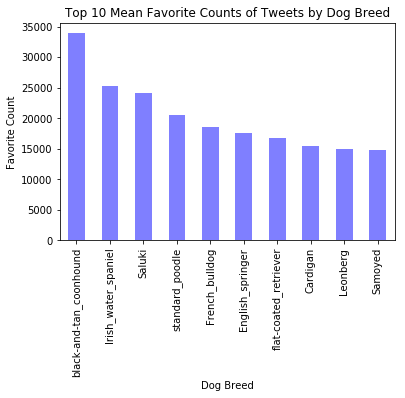

In [63]:
# As score mean can be swayed by a small number of biased tweets, I think favorite count (multi-user rated) would be a better value for visualisation of popular dog breeds
df_clean.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(10).plot(kind='bar',alpha=0.5, color= 'Blue');
plt.figsize=(10,8);
plt.title('Top 10 Mean Favorite Counts of Tweets by Dog Breed');
plt.xlabel('Dog Breed');
plt.ylabel('Favorite Count');